In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import

In [2]:
# !pip install fishervector

In [3]:
# import numpy as np
# import pandas as pd
# import pickle
# import gc
# from sklearn.preprocessing import LabelEncoder, Normalizer
# from xgboost import XGBClassifier

In [4]:
# train_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/train.csv')

# train_label = train_df.melt(['image_id'])
# train_label.drop(index=train_label[train_label['value'] == 0].index, inplace=True)

# train_df = train_df.merge(train_label, on='image_id')
# train_df.drop(columns=['value'], inplace=True)
# train_df.rename(columns={'variable': 'class'}, inplace=True)

# le = LabelEncoder()
# train_df['label'] = le.fit_transform(train_df['class'])
# train_df

In [5]:
# test_df = pd.read_csv('../input/plant-pathology-2020-fgvc7/test.csv')
# test_df

# SIFT + Fisher Vector

In [6]:
# from cv2 import SIFT_create, imread
# from fishervector import FisherVectorGMM

# from sklearn.model_selection import GridSearchCV

In [7]:
# sift = SIFT_create(contrastThreshold=0.075)

In [8]:
# sift_des = []
# none_count = 0

# for image_name in train_df['image_id']:
#     img = imread(f'../input/plant-pathology-2020-fgvc7/images/{image_name}.jpg')
#     # gray_img = cvtColor(img, COLOR_RGB2GRAY)

#     kp = sift.detect(img)
#     kp, des = sift.compute(img, kp)
    
#     if des is None:
#         none_count += 1
        
#     sift_des.append(des)
    
# print(f'#None descriptor: {none_count}')

In [9]:
# with open('sift_des.pickle', 'wb') as f:
#     pickle.dump(sift_des, f, pickle.HIGHEST_PROTOCOL)
    
# train_sift = np.vstack(sift_des)
# train_sift = train_sift.reshape((1, *train_sift.shape))

In [10]:
# fv_gmm = FisherVectorGMM().fit_by_bic(train_sift, [10, 30, 60], 'fv_gmm.pickle')

In [11]:
# with open('../input/app-cq18/sift_des.pickle', 'rb') as f:
#     sift_des = pickle.load(f)
    
# with open('../input/app-cq18/fv_gmm.pickle', 'rb') as f:
#     fv_gmm = pickle.load(f)

In [12]:
# train_fv = np.concatenate([fv_gmm.predict(des.reshape(1, *des.shape)) for des in sift_des]).\
#             reshape(train_df.shape[0], -1)
# # train_fv = np.concatenate(train_fv)
# train_fv.shape

In [13]:
# normalizer = Normalizer(copy=False)
# train_fv = normalizer.fit_transform(train_fv)

In [14]:
# boosters = ['gbtree', 'gblinear']
# n_estimators = [50, 100, 150, 200]
# max_depth = [3, 6, 12, 18]
# # learning_rate = [0.01, 0.1, 0.3]

# xgboost_model = XGBClassifier(objective='multi:softmax', use_label_encoder=False,
#                               num_class=4, eval_metric='merror')

# grid_search = GridSearchCV(xgboost_model, {'booster': boosters, 'n_estimators': n_estimators, 'max_depth': max_depth},
# #                                            'learning_rate': learning_rate},
#                            scoring='balanced_accuracy', cv=5, verbose=4, refit=False)

In [15]:
# grid_search = grid_search.fit(train_fv, train_df['label'])

# Neural Network as feature extractor

In [16]:
# from tensorflow.data import Dataset, AUTOTUNE

# train_ds = Dataset.list_files('../input/plant-pathology-2020-fgvc7/images/Train_*.jpg', False)
# test_ds = Dataset.list_files('../input/plant-pathology-2020-fgvc7/images/Test_*.jpg', False)

In [17]:
# from tensorflow.io import read_file, decode_jpeg
# from tensorflow.image import resize

# def decode_img(img):
#   # Convert the compressed string to a 3D uint8 tensor
#   img = decode_jpeg(img, channels=3)
    
#   # Resize the image to the desired size
#   return resize(img, [224, 224])

# def process_path(file_path):
#     # Load the raw data from the file as a string
#     img = read_file(file_path)
#     img = decode_img(img)
#     return img

# train_images = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
# test_images = test_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [18]:
# from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

# preprocess_train_images = train_images.map(preprocess_input, num_parallel_calls=AUTOTUNE)
# preprocess_test_images = test_images.map(preprocess_input, num_parallel_calls=AUTOTUNE)

In [19]:
# def configure_for_performance(ds):
#     ds = ds.cache()
#     ds = ds.batch(32)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

# preprocess_train_images = configure_for_performance(preprocess_train_images)
# preprocess_test_images = configure_for_performance(preprocess_test_images)

In [20]:
# vgg19_model = VGG19(include_top=False, input_shape=(224,224,3), pooling='max')

# train_features = vgg19_model.predict(preprocess_train_images, verbose=1)
# train_features = train_features.reshape(train_df.shape[0], -1)

In [21]:
# test_features = vgg19_model.predict(preprocess_test_images, verbose=1)
# test_features = test_features.reshape(test_df.shape[0], -1)

# np.savez_compressed('features', train=train_features, test=test_features)

In [22]:
# features = np.load('../input/app-cq18/features.npz')
# train_features = features['train']
# test_features = features['test']

# train_features.shape, test_features.shape

In [23]:
# xgboost_model = XGBClassifier(n_estimators=512, objective='multi:softprob', use_label_encoder=False,
#                               num_class=4, eval_metric='merror', verbosity=1,
#                              max_depth=10, colsample_bytree=0.8, subsample=0.8)

# xgboost_model = xgboost_model.fit(train_features, train_df['label'])
# predict_prob = xgboost_model.predict_proba(test_features)

In [24]:
# predict_df = pd.DataFrame(predict_prob, columns=train_df.columns[1:5])
# predict_df

In [25]:
# predict_df = test_df.join(predict_df)
# predict_df

In [26]:
# predict_df.to_csv('predict.csv', index=False)

In [27]:
# xgboost_model.save_model('xgb_vgg.json')
# np.save('predict_prob.npy', predict_prob, False)

# 1. Mô tả ứng dụng
**Lưu đồ quá trình huấn luyện mô hình XGBoost**

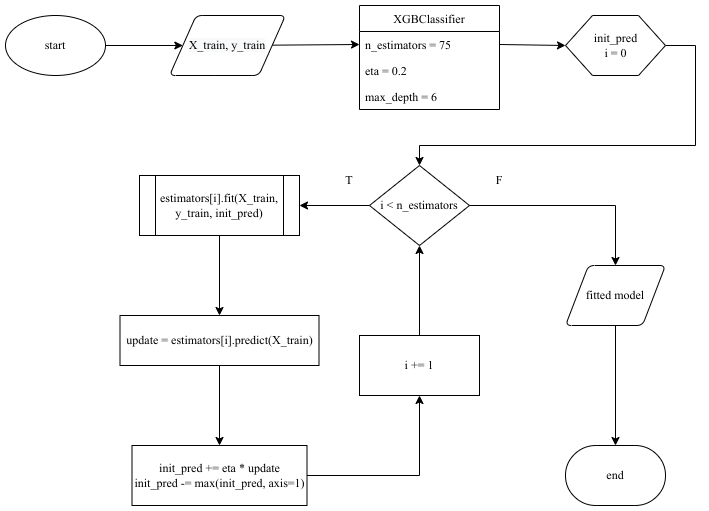

Giá trị của nút lá j được tính:
$w^*_j = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}$

Trong đó:
- $I_j$ là tập các đối tượng tại nút $j$.
- $g_i, h_i$ lần lượt là các giá trị đạo hàm bậc 1 và 2 của hàm mất mát được chọn.

Độ lợi của 1 phương án phân nhánh đề xuất được tính theo [công thức](https://www.youtube.com/watch?v=ZVFeW798-2I&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ&index=3):
$\mathsf{gain} = \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{G^2}{H + \lambda}$

Trong đó:
- $G, H$ lần lượt là tổng các đạo hàm bậc 1 và 2 hàm mất mát của các đối tượng.
    - $G_L, H_L$ ứng với các đối tượng dự kiến ở nút con trái, $G_R, H_R$ là ở nút con phải.
    
# 2. Cài đặt tuần tự
## 2.2 Thiết kế
### 2.2.2. Dự đoán từ dữ liệu đã được trích xuất và mô hình XGBoost đã train
- Đọc mô hình:
    - Mở và phân tích cú pháp json tập tin siêu tham số mô hình.
    - Truy xuất từ điển thành phần chứa các siêu tham số, lấy ra các tham số:
        - n_estimators: số lượng cây quyết định thành phần của mô hình.
        - n_classes: số phân lớp huấn luyện.
        - max_depth: độ sâu tối đa.
    - Xác định số nút tối đa theo độ sâu tối đa: $\sum_{i=0}^{\mathsf{max\_depth}} 2^i$
    - Tạo mảng biểu diễn cây quyết định và đọc thông tin cây.
- Dự đoán:
    - Tạo mảng n_classes phần tử, phần tử $i$ thể hiện xác suất thuộc về phân lớp $i$.
    - Duyệt cây: kết quả duyệt cây $i$ tính tổng tích lũy cho phần tử $i \mod \mathsf{n\_classes}$

**Ví dụ cây quyết định và biểu diễn mảng**

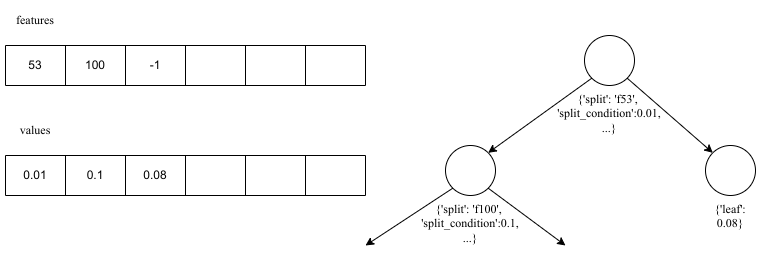

## Huấn luyện mô hình XGBoost sử dụng thư viện xgboost

In [28]:
import numpy as np #, pandas as pd
import cv2 as cv
from numba import njit
from xgboost import XGBClassifier
from glob import glob

In [29]:
def applyCannyThreshold(frame, val):
    ratio = 1.2
    kernel_size = 3
    low_threshold = val
    img_blur = cv.GaussianBlur(frame, (3, 3), 0)
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = frame * (mask[:,:].astype(frame.dtype))
    return dst


@njit
def zipImage(src, zip_x, zip_y, ratio):
    '''
    Hàm dùng để nén ảnh với threshold là ratio sẽ trả ra kết quả là ảnh với block tương ứng với zip x zip
    và nếu block nào không đủ pixel yêu cầu thì là 0 còn ngược lại thì là 1.
    '''
    rs, cs = src.shape
    zip_rs = int(rs / zip_y)
    zip_cs = int(cs / zip_x)
    for idx in range(0, zip_rs * zip_y, zip_y):
        for jdx in range(0, zip_cs * zip_x, zip_x):
            block_img = src[idx : idx + zip_y, jdx : jdx + zip_x]
            num_pixel = np.sum(block_img > 0)
            if num_pixel >= zip_x*zip_y * ratio:
                block_img[:,:] = 1
            else:
                block_img[:,:] = 0

    return src

@njit
def joinNeiboorPixel(src, zip_x, zip_y, mask_size, ratio):
    '''
    Hàm dùng để liên kết các ô xung quanh để lấp khuyết sẽ trả ra kết quả là một ma trận mask.
    '''
    rs, cs = src.shape
    zip_rs = int(rs / zip_y)
    zip_cs = int(cs / zip_x)
    half = int(mask_size / 2)
    dst = src.copy()
    for idx in range(half , zip_rs - half):
        for jdx in range(half, zip_cs - half):
            start_row_mask = (idx - half ) * zip_y
            end_row_mask = (idx + half + 1) * zip_y
            start_col_mask = (jdx - half) * zip_x
            end_col_mask = (jdx + half + 1) * zip_x
            mask_block = src[start_row_mask : end_row_mask, start_col_mask : end_col_mask]
            block_img = dst[idx * zip_y : (idx + 1) * zip_y, jdx * zip_x : (jdx + 1) * zip_x]
            num_pixel = np.sum(mask_block > 0)
            if num_pixel >= mask_size * mask_size * zip_x * zip_y * ratio:
                block_img[:,:] = 1
    return dst

In [30]:
def fd_histogram(image):
    bins = 8
    # convert the image to HSV color-space
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # compute the color histogram
    hist  = cv.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 255, 0, 255, 0, 255])

    # normalize the histogram
    cv.normalize(hist, hist)

    # return the histogram
    return hist.flatten()

def fd_hu_moments(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    feature = cv.HuMoments(cv.moments(image)).flatten()
    return feature


def getFigureForImage(path):
    img = cv.imread(path)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(gray, (3, 3), 0)

    mask_img = applyCannyThreshold(gray, 12)
    mask_img = zipImage(mask_img, 8, 8, 0.12)
    mask_img = zipImage(mask_img, 16, 16, 0.2)
    mask_img = joinNeiboorPixel(mask_img, 8, 8, 3, 0.15)
    mask_img = joinNeiboorPixel(mask_img, 16, 16, 3, 1 / 3)

    for chanel in range(3):
        img[:,:,chanel] = img[:,:,chanel] * mask_img

    hist_figure = fd_histogram(img).astype(np.float64)
    hu_monents = fd_hu_moments(img)
                               
    fig = np.concatenate((hist_figure, hu_monents))
    return fig

In [31]:
# with open('../input/fgvc7featextract/train_data.csv') as f:
#     ncols = len(f.readline().split(','))

# X_train = np.loadtxt('../input/fgvc7featextract/train_data.csv',delimiter=',', skiprows=1, usecols=range(ncols-1))
# X_test = np.loadtxt('../input/fgvc7featextract/test_data.csv',delimiter=',', skiprows=1, usecols=range(ncols-1))
y_train = np.load('../input/fgvc7featextract/train_label.npy')

In [32]:
def get_sort_key(s):
    start = s.rfind('_') + 1
    end = s.rfind('.')
    return int(s[start:end])

In [33]:
train_ls = glob('../input/plant-pathology-2020-fgvc7/images/Train_*')
train_ls = sorted(train_ls, key=get_sort_key)

image_features = [getFigureForImage(path) for path in train_ls]

X_train = np.vstack(image_features)
np.save('X_train', X_train, False)
X_train.shape

(1821, 519)

In [34]:
xgb = XGBClassifier(objective='multi:softmax', num_class=4, n_estimators=75, learning_rate=0.2,
                   use_label_encoder=False)
xgb = xgb.fit(X_train, y_train)

[16:15:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
test_ls = glob('../input/plant-pathology-2020-fgvc7/images/Test_*')
test_ls = sorted(test_ls, key=get_sort_key)

image_features = [getFigureForImage(path) for path in test_ls]

X_test = np.vstack(image_features)
np.save('X_test', X_test, False)
X_test.shape

(1821, 519)

In [36]:
y_pred = xgb.predict_proba(X_test)
y_pred

array([[1.4948586e-04, 1.3523972e-04, 9.9952698e-01, 1.8836418e-04],
       [1.2716278e-02, 5.3265216e-03, 9.4640368e-01, 3.5553504e-02],
       [2.5366908e-03, 4.7171128e-04, 1.4235178e-04, 9.9684924e-01],
       ...,
       [5.8830768e-01, 2.4206876e-03, 4.0042067e-01, 8.8509750e-03],
       [8.5313112e-01, 2.7456027e-03, 4.3886704e-03, 1.3973455e-01],
       [3.2998118e-01, 1.4062706e-01, 1.0247231e-01, 4.2691943e-01]],
      dtype=float32)

In [37]:
np.savetxt('xgblib_prob.csv', y_pred, fmt='%f', delimiter=',')
# import pandas as pd
# pred = pd.read_csv('../input/plant-pathology-2020-fgvc7/test.csv')

In [38]:
xgb.get_booster().dump_model('xgb_tree.json', dump_format='json')
xgb.save_model('xgb_hyperparams.json')

# Kiểm tra việc đọc mô hình đã huấn luyện

In [39]:
# !python ../input/xgbfromscratchsrc/test.py ../input/fgvc7featextract/test_data.csv \
# ../input/xgbfromscratchsrc/xgb_hyperparams.json ../input/xgbfromscratchsrc/xgb_tree.json

# Tài liệu tham khảo
- https://towardsdatascience.com/using-nmf-to-classify-companies-a77e176f276f
- https://github.com/jonasrothfuss/fishervector
- https://hal.inria.fr/hal-00779493/file/RR-8209.pdf
- https://viblo.asia/p/sift-scale-invariant-feature-transform-huan-luyen-mo-hinh-cho-cac-bai-toan-phan-loai-924lJqJaZPM
- https://xgboost.readthedocs.io/en/stable/
- https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
- https://medium.com/analytics-vidhya/what-makes-xgboost-so-extreme-e1544a4433bb
- https://www.tensorflow.org/tutorials/load_data/images#using_tfdata_for_finer_control
- https://www.smartdraw.com/flowchart/flowchart-symbols.htm